In [41]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'D:\machine learning contents\datasets\drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [20]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<Axes: ylabel='count'>

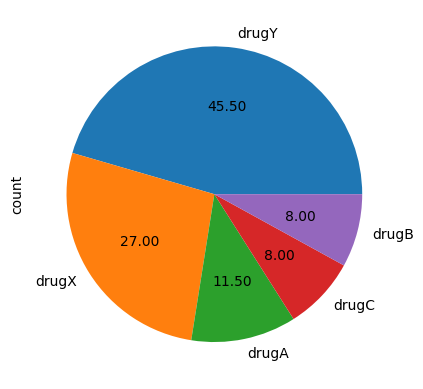

In [21]:
df['Drug'].value_counts().plot(kind='pie',autopct='%.2f')

In [22]:
X=df.drop(['Drug'],axis=1)
Y=df['Drug']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
y_test

95     drugX
15     drugY
30     drugX
158    drugC
128    drugY
115    drugY
69     drugY
170    drugX
174    drugA
45     drugX
66     drugA
182    drugX
165    drugY
78     drugA
186    drugB
177    drugY
56     drugB
152    drugX
82     drugC
68     drugY
124    drugB
16     drugX
148    drugX
93     drugY
65     drugY
60     drugY
84     drugC
67     drugX
125    drugY
132    drugX
9      drugY
18     drugC
55     drugC
75     drugY
150    drugA
104    drugY
135    drugX
137    drugA
164    drugY
76     drugA
Name: Drug, dtype: object

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

cu=ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[
        ['LOW','NORMAL','HIGH'],
        ['LOW','NORMAL','HIGH'],
        ['F','M'],
    ]),['BP','Cholesterol','Sex'])
],remainder='passthrough')

In [47]:

cu.fit(x_train)

x_train1=cu.transform(x_train)
x_test1=cu.transform(x_test)

x_test1

array([[ 0.   ,  1.   ,  1.   , 36.   , 11.424],
       [ 2.   ,  1.   ,  0.   , 16.   , 15.516],
       [ 1.   ,  1.   ,  0.   , 18.   ,  8.75 ],
       [ 0.   ,  2.   ,  0.   , 59.   , 10.444],
       [ 0.   ,  1.   ,  1.   , 47.   , 33.542],
       [ 2.   ,  2.   ,  1.   , 51.   , 18.295],
       [ 2.   ,  1.   ,  0.   , 18.   , 24.276],
       [ 1.   ,  2.   ,  0.   , 28.   , 12.879],
       [ 2.   ,  1.   ,  1.   , 42.   , 12.766],
       [ 1.   ,  1.   ,  0.   , 66.   ,  8.107],
       [ 2.   ,  2.   ,  1.   , 29.   , 12.856],
       [ 0.   ,  1.   ,  0.   , 20.   , 11.686],
       [ 0.   ,  2.   ,  1.   , 38.   , 18.295],
       [ 2.   ,  2.   ,  0.   , 19.   , 13.313],
       [ 2.   ,  2.   ,  1.   , 70.   ,  9.849],
       [ 1.   ,  2.   ,  1.   , 25.   , 19.011],
       [ 2.   ,  1.   ,  1.   , 65.   , 11.34 ],
       [ 1.   ,  1.   ,  1.   , 55.   ,  7.261],
       [ 0.   ,  2.   ,  0.   , 32.   ,  9.712],
       [ 1.   ,  2.   ,  1.   , 54.   , 24.658],
       [ 2.   ,  1. 

In [31]:
le=LabelEncoder()

le.fit(y_train)

y_train=le.transform(y_train)
y_test=le.transform(y_test)

In [33]:
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
sr.fit(x_train1)

x_train=sr.transform(x_train1)
x_test=sr.transform(x_test1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
model=DecisionTreeClassifier()
model.fit(x_train,y_train)  
print(model.predict(x_test)," ", y_test)


[3 4 3 2 4 4 4 3 0 3 0 3 4 0 1 4 1 3 2 4 1 3 3 4 4 4 2 3 4 3 4 2 2 4 0 4 3
 0 4 0]   [3 4 3 2 4 4 4 3 0 3 0 3 4 0 1 4 1 3 2 4 1 3 3 4 4 4 2 3 4 3 4 2 2 4 0 4 3
 0 4 0]


In [48]:
def validation(input_data):
        model.predict([input_data])
        if model.predict([input_data])==0:
            return "DrugA"
        elif model.predict([input_data])==1:
            return "DrugB"
        elif model.predict([input_data])==2:
            return "DrugC"
        elif model.predict([input_data])==3:
            return "DrugX"
        else:
            return "DrugY"
        

input_data = [23,0,2,2,25355]
print(validation(input_data))

DrugY
